Here we will be exploring two of the most popular forms of dimesionality reduction and data visualization. The first, Principal Component Analysis, or PCA is a mathematical approach that works to reorient the data so that the first dimension of the data is the first Principal Component... Effectively this means that the first component is the most discriminative with respect to the data, eg. it has the most variation. The next approach that we will be exploring is called t-distributed stochastic neighbor embedding or T-SNE for short. This is a method that learns a projection of the data into whatever space you request. This is an iterative approach that attempts to preserve the topology of the data while separating it.

Now with all that said lets look at some code!

We will be using the MNIST Dataset because it is easy to work with and people are framiliar with it. For the purposes of this demo we wont be using pytorch, instead we will be using a different library... ScikitLearn which has predefined methods for both PCA and TSNE. So lets dig in! 

In [10]:
import numpy as np
from sklearn.datasets import fetch_mldata

#First we load the MNIST data and we store it in some variables
mnist = fetch_mldata("MNIST original")
mnist_train = mnist.data
mnist_train_labels = mnist.target

#Then we shuffle the order just to keep things fresh
randomOrder = np.random.permutation(mnist_train.shape[0])
for i, j in enumerate(randomOrder):
  mnist_train[i] = mnist.data[j]
  mnist_train_labels[i] = mnist.target[j]

#print out the shape of the training data just so we can see how much data we have, in the real world you would sort this into test and train splits, but we arent going to worry about that today
print(mnist_train.shape)
  
#Then here we are going to generate some color labels for each example for when we want to plot them. This will come in useful later
colorLookup = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown', 6:'tab:pink', 7:'tab:gray', 8:'tab:olive', 9:'tab:cyan'}
colorLabels = [colorLookup[int(i)] for i in mnist_train_labels]

(70000, 784)


The nice thing about this library is that it makes everything very easy to use, so in order to get a PCA of our high dimensional data (784 dimensions) we just need to call PCA.

In [0]:
from sklearn.decomposition import PCA

#Generate our PCA representation...
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mnist_train)

Once we have our Principal Components extracted we just need to plot them, so now we can do that with matplotlib.

As you can see it does a decent-ish job of seperating the data, but it doesnt do it perfectly... there is a lot of overlap and its not clustered. This is to be expected with PCA, we arent looking for clusters of data here, we are looking for a good distribution of our data across our space, which we appear to get below. 

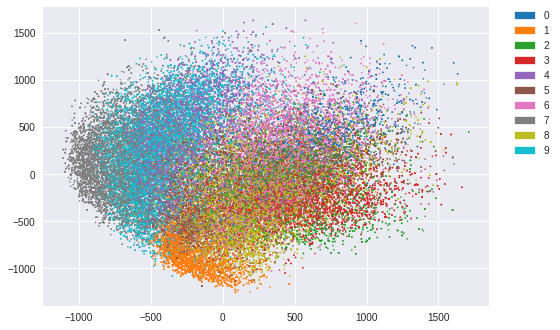

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Then we plot it
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colorLabels, s=1.5)
patches = [mpatches.Patch(color=c, label=str(key)) for key, c in colorLookup.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Next we have T-SNE which is a totally different approach. This is an iterative approach that is trained using gradient descent with KL divergence. Using this metric we are able to spread the data around our space and into representations that we wouldnt have found using PCA. 

You can read about how T-SNE works by reading the paper [here](http://www.jmlr.org/papers/v9/vandermaaten08a.html).

As this is an iterative approach, this will take much longer than PCA so we will perform this operation on a subset of our data instead of the whole dataset to save time. In the real world you would want to take the time to run this on all of your (training) data to develop the strongest representation. Remember this is an unsupervised method, I am often quite suprised with how intuitive the results from T-SNE are. Lets look at the code for this next.

In [4]:
from sklearn.manifold import TSNE

#Downsample our data so we can run T-SNE in a reasonable timeframe
TSNE_DOWNSAMPLE = 7000
mnist_downsample = mnist_train[:TSNE_DOWNSAMPLE]
mnist_labels_downsample = mnist_train_labels[:TSNE_DOWNSAMPLE]

#Then we just run T-SNE and we collect our results on the other side
#Again, since this is a stochastic approach, it may not be the same every time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(mnist_downsample)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.540s...
[t-SNE] Computed neighbors for 7000 samples in 96.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 481.493623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.213936
[t-SNE] Error after 300 iterations: 2.439005


Once T-SNE has generated our projection we can go ahead and plot it in the same way that we plotted the PCA results above.

As this is a stochastic approach that is trained using gradient descent, the results will be slightly different every time, but they will typically be fairly similar. 

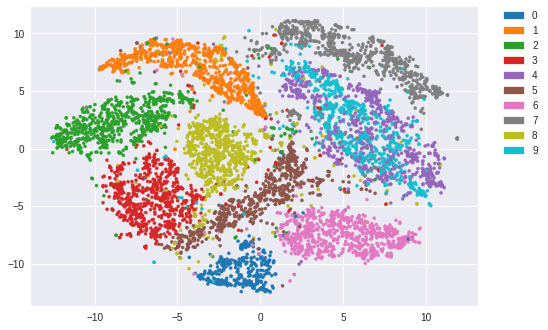

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colorLabels = [colorLookup[int(i)] for i in mnist_labels_downsample]

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colorLabels, s=10)
patches = [mpatches.Patch(color=c, label=str(key)) for key, c in colorLookup.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

You should note that there is nothing stopping us from combining these methods. For example you could easily generate a PCA representation of a projection learned through T-SNE. Or you could do the opposite and run T-SNE over a distribution generated from PCA. This isnt done often, but it can be helpful to visualize what is happening in your dataset. Lets do that now. 

In [15]:
#Here we are going to work with the same subset of our downsampled MNIST data
#And we are going to run T-SNE over it in 10 dimensional space
hd_tsne = TSNE(n_components=10, verbose=1, perplexity=40, n_iter=300)
hd_tsne_results = tsne.fit_transform(mnist_downsample)

#Since we cannot easily visualize 10 dimensional space we can then run PCA on this data
tsne_pca = PCA(n_components=2)
tsne_pca_result = pca.fit_transform(hd_tsne_results)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.551s...
[t-SNE] Computed neighbors for 7000 samples in 97.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 481.493623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.203743
[t-SNE] Error after 300 iterations: 2.440031


Once our T-SNE nonlinear projection has been learned and we have applied PCA onto this data as well we can go ahead and plot the data on a 2D scatter plot like we did above. 

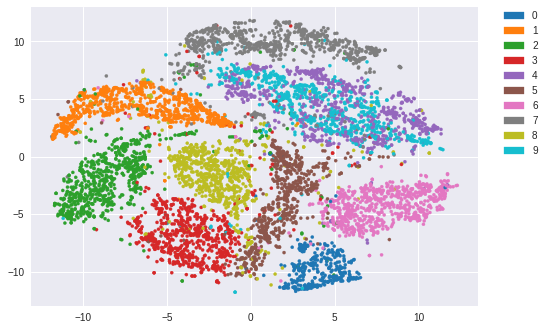

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colorLabels = [colorLookup[int(i)] for i in mnist_labels_downsample]

plt.scatter(tsne_pca_result[:, 0], tsne_pca_result[:, 1], c=colorLabels, s=10)
patches = [mpatches.Patch(color=c, label=str(key)) for key, c in colorLookup.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can also do the reverse of this operation, running PCA first and then running TSNE on it afterwards. Lets do that below.

In [20]:
#Here we are going to work with the same subset of our downsampled MNIST data
#And we are going to run PCA over it in 50 dimensional space

hd_pca = PCA(n_components=50)
hd_pca_result = pca.fit_transform(mnist_downsample)

#Since we cannot easily visualize 50 dimensional space we can then run PCA on this data
pca_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
pca_tsne_results = tsne.fit_transform(hd_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.002s...
[t-SNE] Computed neighbors for 7000 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 13.504521
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.292824
[t-SNE] Error after 300 iterations: 1.708610


Now we can plot this data that we just generated below.

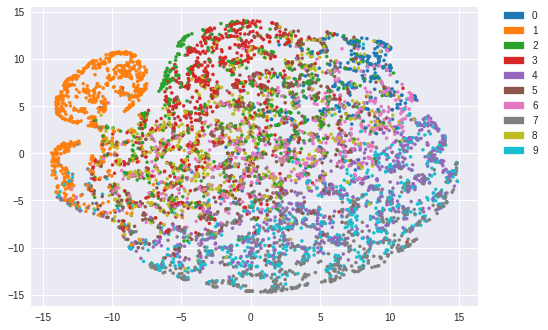

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colorLabels = [colorLookup[int(i)] for i in mnist_labels_downsample]

plt.scatter(pca_tsne_results[:, 0], pca_tsne_results[:, 1], c=colorLabels, s=10)
patches = [mpatches.Patch(color=c, label=str(key)) for key, c in colorLookup.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Some people may argue that these stacked projections are slightly more representative of the data but they both serve different purposes.

Now we can visualize things in high dimensions. Hopefully you can see how these things are helpful for really looking at your data even when its hard for you to visualize high dimensional spaces. 